##                                            Telecom Customer Churn Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# loading the dataset to a Pandas DataFrame
import pandas as pd
import numpy as np
# Read the Excel file into a Pandas DataFrame
# Make sure the path to the file is correct. If the file is in the same directory as the notebook, you can use just the file name.
# If it's in a different directory, provide the full path.
df = pd.read_csv('/content/drive/MyDrive/Group_Project_ChurnData/ChurnData.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
## Shape of the dataset
df.shape

(7043, 21)

In [4]:
## Identify the each variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
##Object Values included in each variables
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values of {col} variable:", df[col].unique())


Unique values of customerID variable: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values of gender variable: ['Female' 'Male']
Unique values of Partner variable: ['Yes' 'No']
Unique values of Dependents variable: ['No' 'Yes']
Unique values of PhoneService variable: ['No' 'Yes']
Unique values of MultipleLines variable: ['No phone service' 'No' 'Yes']
Unique values of InternetService variable: ['DSL' 'Fiber optic' 'No']
Unique values of OnlineSecurity variable: ['No' 'Yes' 'No internet service']
Unique values of OnlineBackup variable: ['Yes' 'No' 'No internet service']
Unique values of DeviceProtection variable: ['No' 'Yes' 'No internet service']
Unique values of TechSupport variable: ['No' 'Yes' 'No internet service']
Unique values of StreamingTV variable: ['No' 'Yes' 'No internet service']
Unique values of StreamingMovies variable: ['No' 'Yes' 'No internet service']
Unique values of Contract variable: ['Month-to-month' 'One year' 'Two yea

In [7]:
##Value count of each categorical Variables
for col in df.select_dtypes(include='object').columns:
    print(f"Value count of {col} variable:", df[col].value_counts())


Value count of customerID variable: customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Value count of gender variable: gender
Male      3555
Female    3488
Name: count, dtype: int64
Value count of Partner variable: Partner
No     3641
Yes    3402
Name: count, dtype: int64
Value count of Dependents variable: Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Value count of PhoneService variable: PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Value count of MultipleLines variable: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Value count of InternetService variable: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Value count of OnlineSecurity variable: OnlineSecurity
N

In [8]:
## Cheak the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# identify missing and duplicated values

# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

# Check for duplicated values
duplicated_values = df.duplicated().sum()

# Print the number of duplicated rows
print(duplicated_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


In [10]:
##Minimum and Maximum values

import pandas as pd

# Convert the TotalCharges column to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Print the maximum value of the TotalCharges column
print("Max Total Charge:", df['TotalCharges'].max())
# Min value of the TotalCharges column
print("Min Total Charge:", df['TotalCharges'].min())

# Print the maximum value of the MonthlyCharges column
print("Max Monthly Charge:", df['MonthlyCharges'].max())
# Min value of the TotalCharges column
print("Min Monthly Charge:", df['MonthlyCharges'].min())

Max Total Charge: 8684.8
Min Total Charge: 18.8
Max Monthly Charge: 118.75
Min Monthly Charge: 18.25


In [ ]:
## Convert senior citizon as categorical variable

df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
import pandas as pd

print("Summary of  Monthly Charge:", df['MonthlyCharges'].describe())
print("Summary of Total charge:", df['TotalCharges'].describe())

Summary of  Monthly Charge: count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
Summary of Total charge: count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object


In [ ]:
import pandas as pd

# Convert the TotalCharges column to numeric type, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in 'TotalCharges' after conversion
missing_charges = df['TotalCharges'].isnull().sum()
print("Missing values in TotalCharges:", missing_charges)

# Now calculate the average TotalCharges grouped by gender
print("Average Total Charge group by gender:", df.groupby("gender")["TotalCharges"].mean())

Missing values in TotalCharges: 11
Average Total Charge group by gender: gender
Female    2283.190985
Male      2283.407861
Name: TotalCharges, dtype: float64


<ipython-input-15-5a659fc9d28c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=colors, ax=ax)
<ipython-input-15-5a659fc9d28c>:31: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=colors, ax=ax)
<ipython-input-15-5a659fc9d28c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Correctly rotate x-axis labels
<ipython-input-15-5a659fc9d28c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x


Average Total Charges by gender:
gender
Male      2283.407861
Female    2283.190985
Name: TotalCharges, dtype: float64



Average Total Charges by Contract:
Contract
Two year          3728.933947
One year          3034.683084
Month-to-month    1369.254581
Name: TotalCharges, dtype: float64



Average Total Charges by InternetService:
InternetService
Fiber optic    3205.304570
DSL            2119.789259
No              665.220329
Name: TotalCharges, dtype: float64

<ipython-input-15-5a659fc9d28c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Correctly rotate x-axis labels
<ipython-input-15-5a659fc9d28c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=colors, ax=ax)
<ipython-input-15-5a659fc9d28c>:31: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=colors, ax=ax)
<ipython-input-15-5a659fc9d28c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Correctly rotate x-axis labels
<ipython-input-15-5a6





Average Total Charges by PaymentMethod:
PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64




<ipython-input-15-5a659fc9d28c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Correctly rotate x-axis labels



Average Total Charges by PaperlessBilling:
PaperlessBilling
Yes    2579.843966
No     1851.738495
Name: TotalCharges, dtype: float64




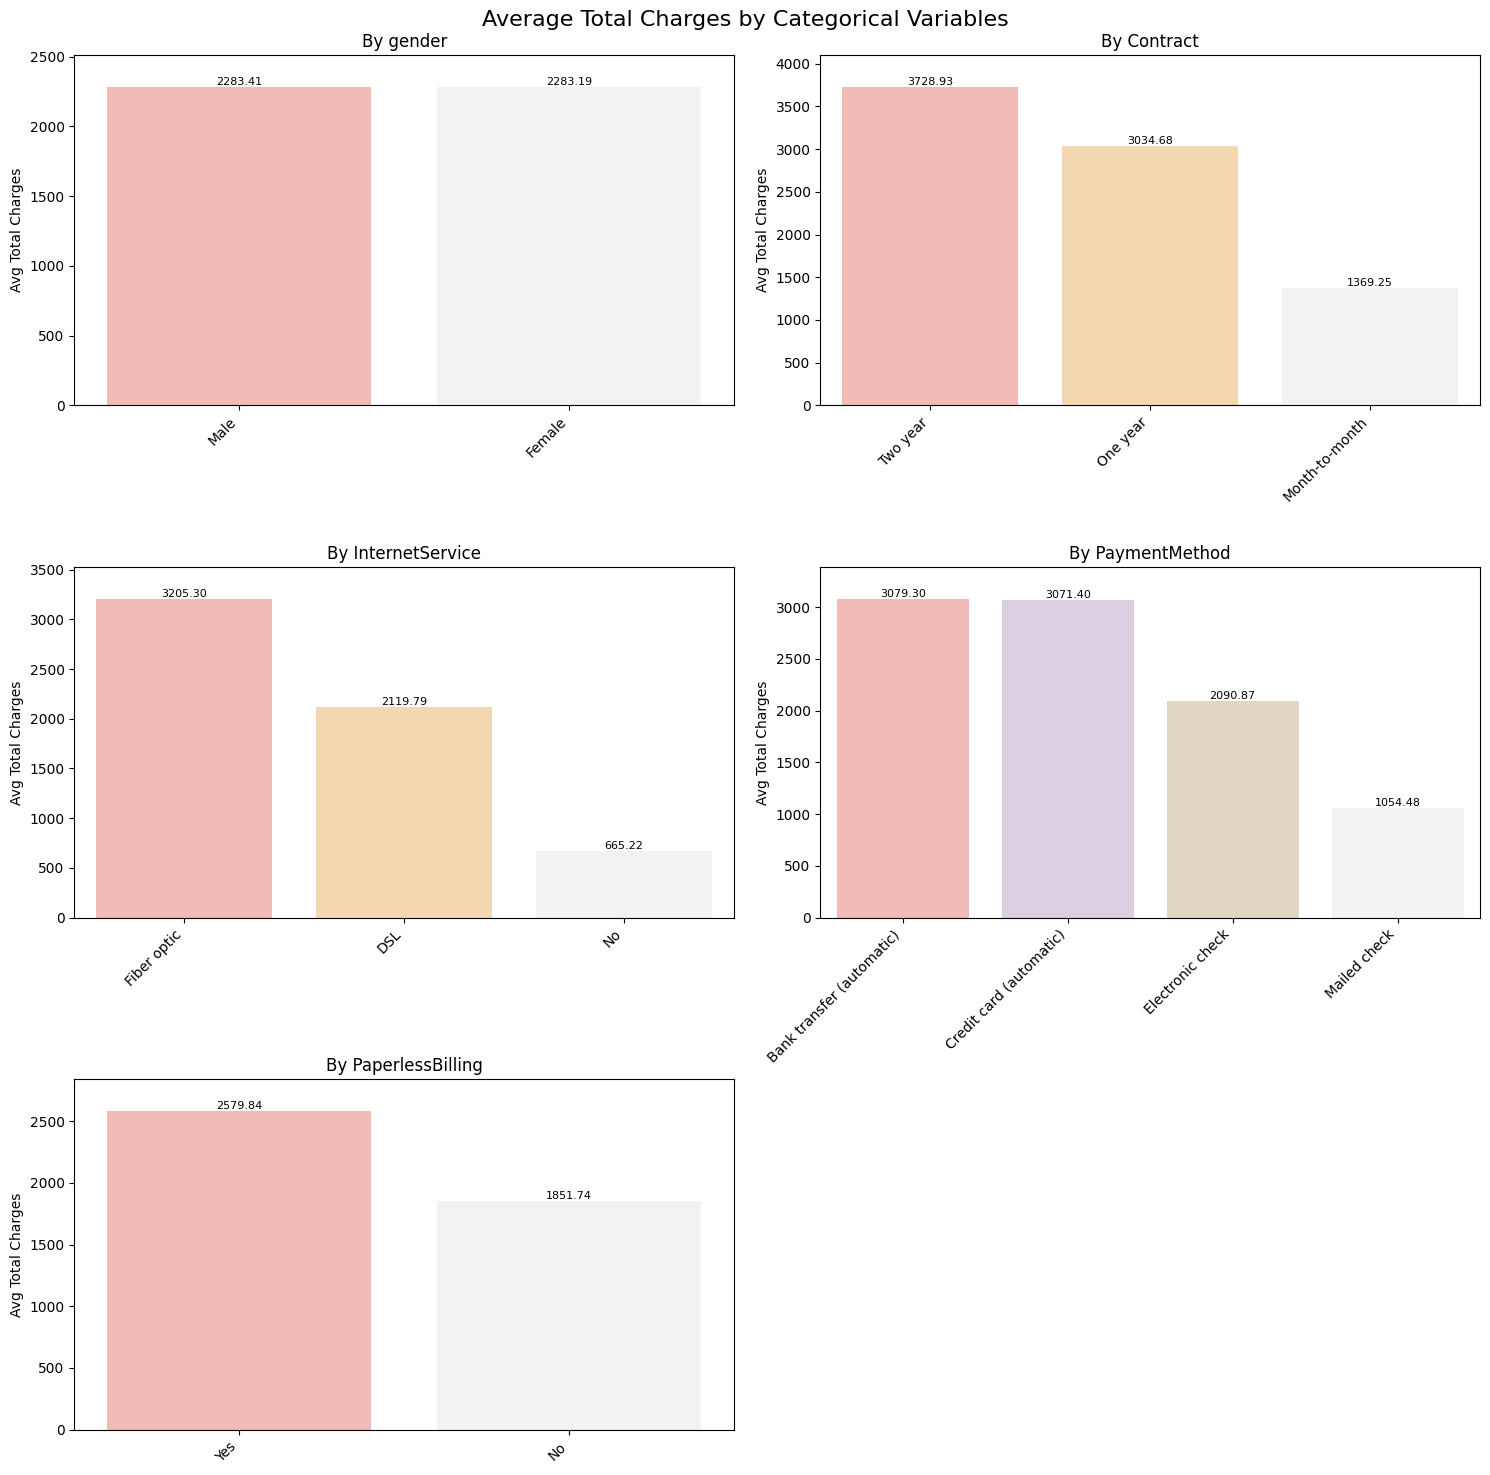

In [ ]:
## Visualizations to disply average Total Charges group by each categorical variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your DataFrame is named 'df' and 'TotalCharges' is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# List of categorical variables
categorical_vars = ['gender', 'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

# Set up the subplot grid
n_vars = len(categorical_vars)
n_cols = 2
n_rows = (n_vars + 1) // 2  # Round up to the nearest integer

# Create a single figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Average Total Charges by Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Function to plot average charges
def plot_average_charges(variable, ax):
    # Calculate average TotalCharges for each category
    avg_charges = df.groupby(variable)['TotalCharges'].mean().sort_values(ascending=False)

    # Create a bar plot with pastel colors
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(avg_charges)))
    sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=colors, ax=ax)

    # Customize the plot
    ax.set_title(f'By {variable}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Avg Total Charges', fontsize=10)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Correctly rotate x-axis labels

    # Add value labels on the bars
    for i, v in enumerate(avg_charges.values):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

    # Adjust y-axis to start from 0
    ax.set_ylim(0, max(avg_charges.values) * 1.1)

    # Print the average values
    print(f"\nAverage Total Charges by {variable}:")
    print(avg_charges)
    print("\n" + "="*50 + "\n")

# Create plots for each categorical variable
for i, var in enumerate(categorical_vars):
    plot_average_charges(var, axes[i])

# Remove any unused subplots
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make room for the main title
plt.show()

In [ ]:
#  duplicat value code

df.duplicated().sum()

0

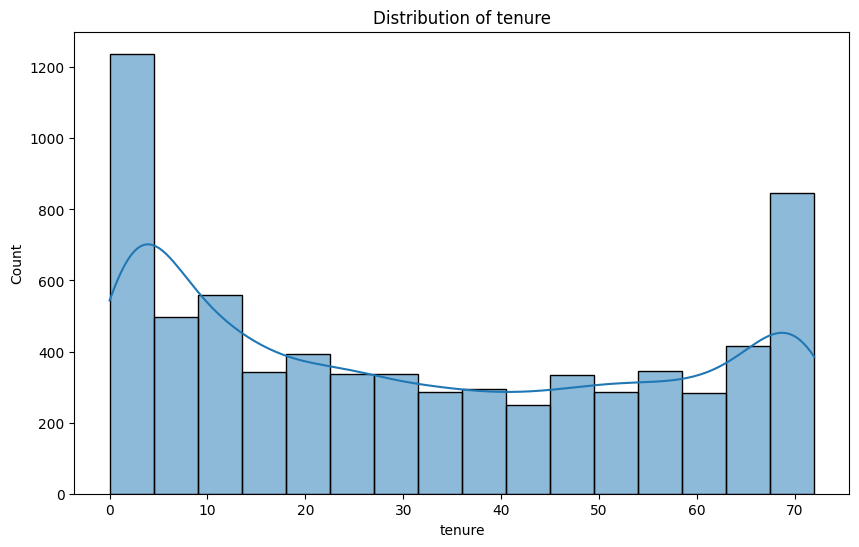

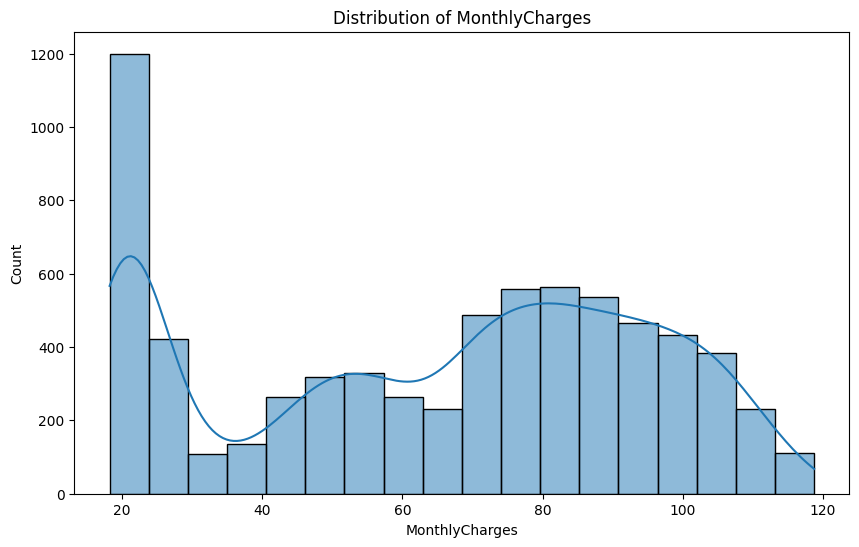

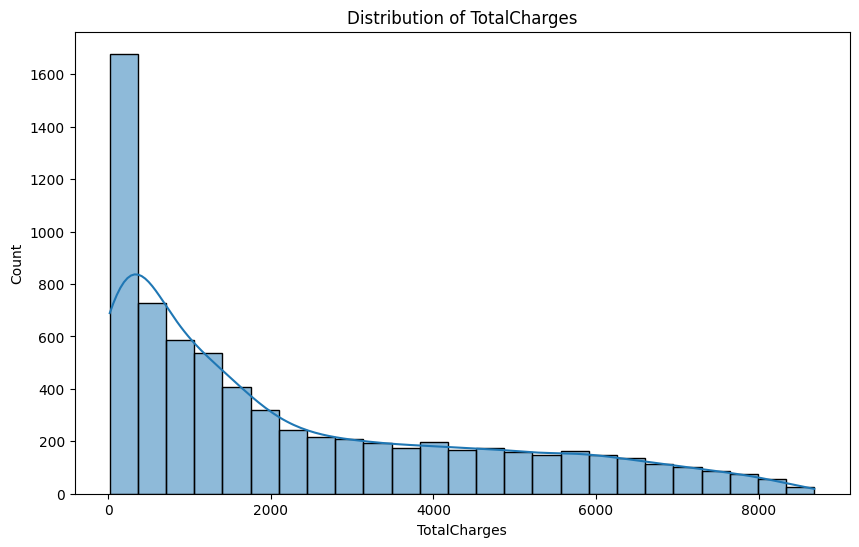

In [ ]:
## Distribution of the numeric variables

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



*   There is a high concentration of customers with a tenure of 0-10 months and around 70 months. The
number of customers decreases gradually between these peaks.
*   The majority of customers have relatively low total charges, with a significant number of customers having
total charges close to zero. As total charges increase, the number of customers decreases, showing a rightskewed distribution.




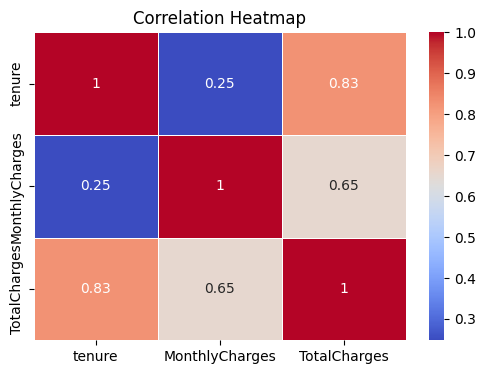

In [ ]:
## Corelation heatmap for numeric variables
!pip install seaborn
import seaborn as sns # Import the seaborn library and alias it as 'sns'
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Define numerical_cols here, before it's used
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.show()

*Customers who stay longer (higher tenure) tend to accumulate higher total charges.

*Higher monthly charges contribute significantly to higher total charges.

*The relationship between tenure and monthly charges is weak.

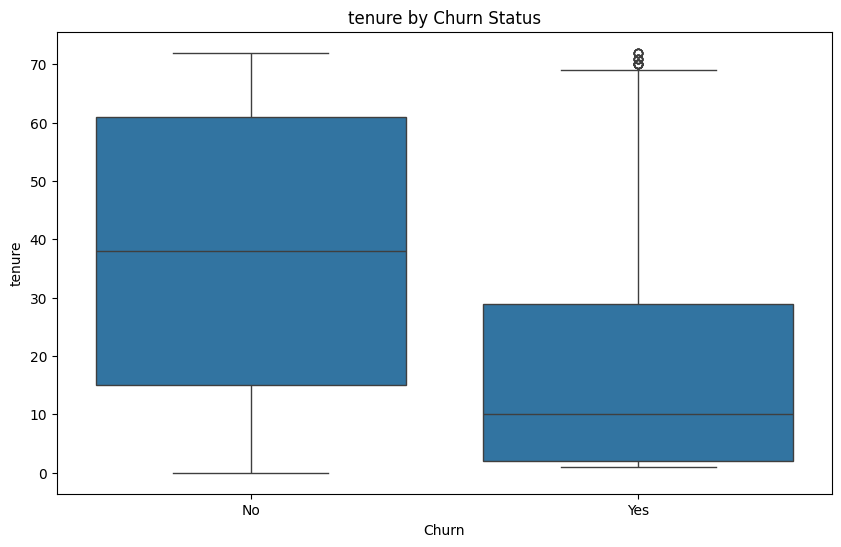

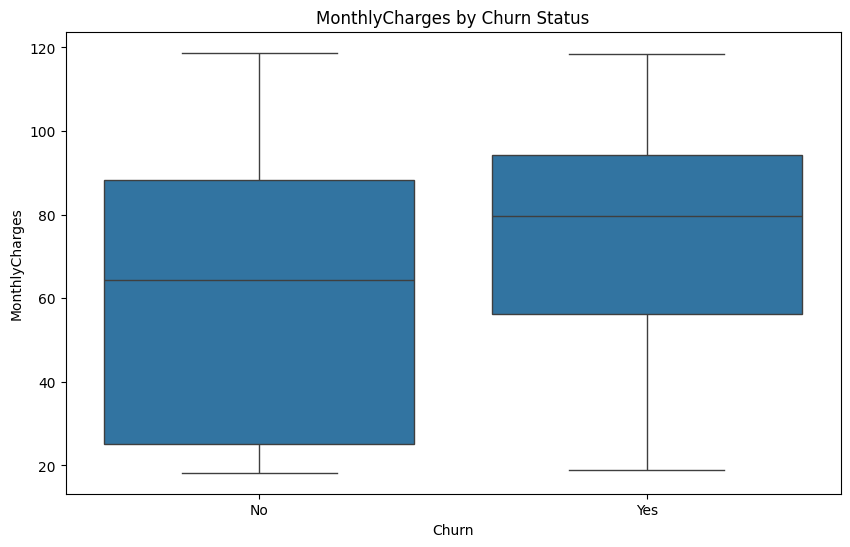

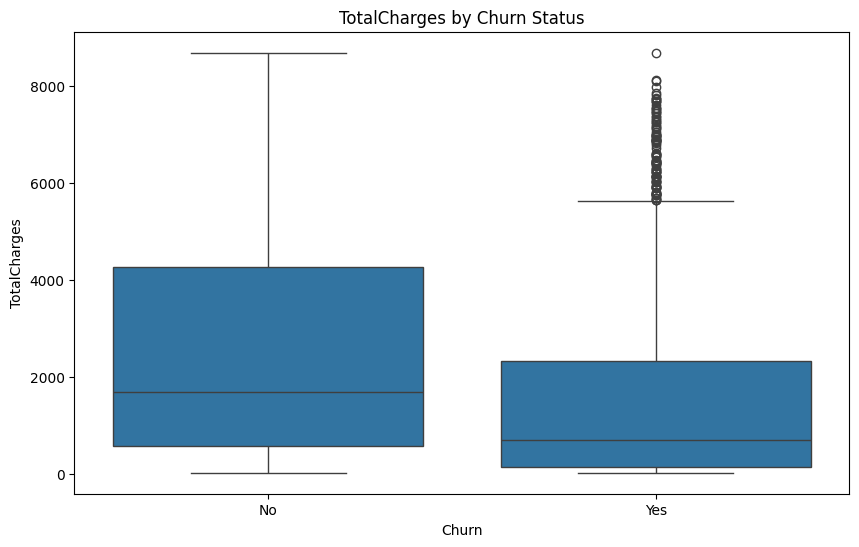

In [ ]:
# Box plots for numerical variables by churn status
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')
    plt.show()

<ipython-input-13-b2fda6a63461>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=df, palette='Set2',


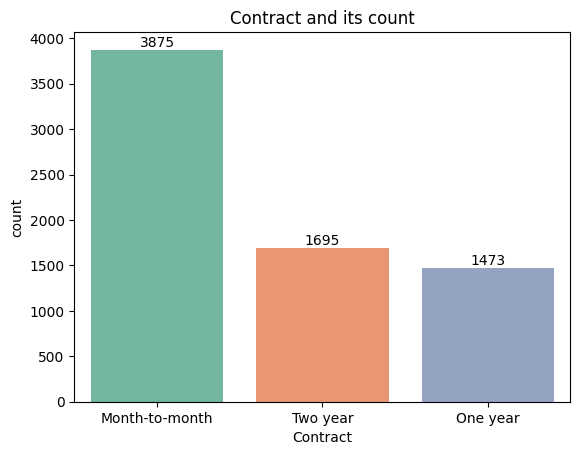

In [13]:
# Contract type wise count
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
sns.countplot(x='Contract', data=df, palette='Set2',
              order=df['Contract'].value_counts().index)
plt.title("Contract and its count")

# Adding bar labels
for i, count in enumerate(df['Contract'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


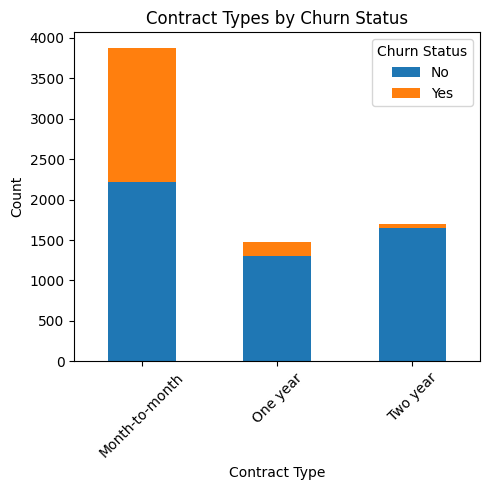

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'
# and has columns 'Contract' and 'Churn'

# Create a crosstab of the data
ct = pd.crosstab(df['Contract'], df['Churn'])

# Create the bar graph
ax = ct.plot(kind='bar', stacked=True, figsize=(5, 5))

# Customize the graph
plt.title('Contract Types by Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



*   Customers with month-to-month contracts are more likely to churn.
*   Longer-term contracts (one-year and two-year) are associated with lower churn rates, suggesting higher customer retention.

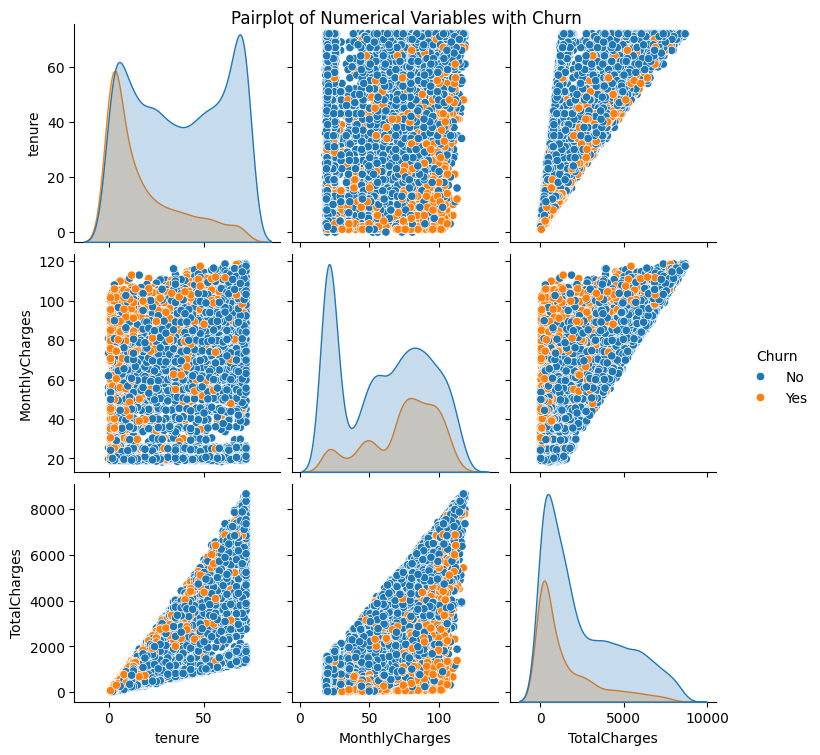

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# List of numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure 'TotalCharges' is included in the numerical columns if it's not already
if 'TotalCharges' not in numerical_cols:
    numerical_cols.append('TotalCharges')

# Pairplot for numerical variables
sns.pairplot(df[numerical_cols + ['Churn']], hue='Churn')
plt.suptitle('Pairplot of Numerical Variables with Churn', y=1.02)
plt.show()


Conclusion

Shorter tenure is associated with a higher likelihood of churn. Retention efforts might be particularly important for new customers.

Higher MonthlyCharges are associated with a higher likelihood of churn. This suggests that customers paying more might be more sensitive to the perceived value or cost.

Lower TotalCharges (which correlates with shorter tenure) is associated with higher churn, reinforcing the need to focus on customer retention early in the customer lifecycle.

# Revenue Analysis Part

<ipython-input-38-87f7f0f6ebb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Contract', y='MonthlyCharges', data=df, palette=colors)


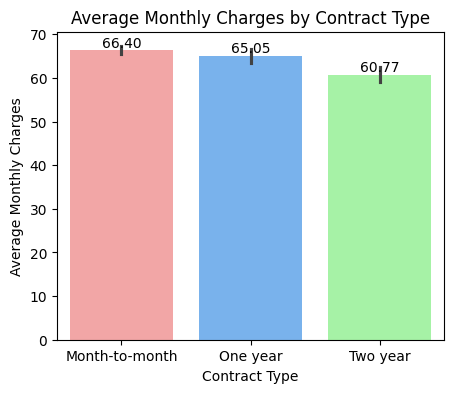

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average Monthly Charges by Contract Type
plt.figure(figsize=(5, 4))
colors = ['#FF9999', '#66B2FF', '#99FF99']
ax = sns.barplot(x='Contract', y='MonthlyCharges', data=df, palette=colors)
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')

# Add bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

plt.show()

##Statistical Tests

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset (replace this with your actual dataset)
# Assuming your dataset is stored in a DataFrame called df

# Define the list of categorical variables to test with 'Churn'
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService',
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform Chi-square test for each categorical variable
for col in categorical_variables:
    contingency_table = pd.crosstab(df['Churn'], df[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} and Churn:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print("")



Chi-square test for gender and Churn:
Chi-square statistic: 0.4840828822091383
P-value: 0.48657873605618596

Chi-square test for SeniorCitizen and Churn:
Chi-square statistic: 159.42630036838742
P-value: 1.510066805092378e-36

Chi-square test for Partner and Churn:
Chi-square statistic: 158.7333820309922
P-value: 2.1399113440759935e-36

Chi-square test for Dependents and Churn:
Chi-square statistic: 189.12924940423474
P-value: 4.9249216612154196e-43

Chi-square test for PhoneService and Churn:
Chi-square statistic: 0.9150329892546948
P-value: 0.3387825358066928

Chi-square test for MultipleLines and Churn:
Chi-square statistic: 11.33044148319756
P-value: 0.0034643829548773

Chi-square test for InternetService and Churn:
Chi-square statistic: 732.309589667794
P-value: 9.571788222840544e-160

Chi-square test for OnlineSecurity and Churn:
Chi-square statistic: 849.9989679615962
P-value: 2.6611496351768565e-185

Chi-square test for OnlineBackup and Churn:
Chi-square statistic: 601.81279011

* SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, and PaymentMethod: These variables all have very small p-values (close to 0), indicating strong evidence to reject the null hypothesis. It suggests that there is a significant association between each of these variables and churn.
*MultipleLines and PhoneService: These variables have p-values less than 0.05, indicating a significant association with churn, although the association might be weaker compared to other variables.
*Gender: This variable has a p-value of 0.487, which is greater than 0.05. Therefore, we do not have enough evidence to reject the null hypothesis. It suggests that there is no significant association between gender and churn based on this dataset.

## ANOVA Test Usage

In [ ]:
from scipy.stats import f_oneway

# Check for missing values in TotalCharges
missing_total_charges = df['TotalCharges'].isnull().sum()
if missing_total_charges > 0:
    print(f"Warning: {missing_total_charges} missing values found in TotalCharges. Handling missing values...")
    # Option 1: Drop rows with missing values
    df.dropna(subset=['TotalCharges'], inplace=True)
    # Option 2: Impute missing values (e.g., using median)
    # df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Perform ANOVA tests for each variable
variables_for_anova = ['InternetService', 'Contract', 'PaymentMethod']
for var in variables_for_anova:
    # Get unique categories
    categories = df[var].unique()
    # Initialize lists to store groups
    groups = []
    # Extract groups for each category
    for cat in categories:
        groups.append(df[df[var] == cat]['TotalCharges'])
    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA test for {var} and TotalCharges:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print("")


ANOVA test for InternetService and TotalCharges:
F-statistic: 796.6880813628617
P-value: 1.400836174544e-312

ANOVA test for Contract and TotalCharges:
F-statistic: 934.7434391036368
P-value: 0.0

ANOVA test for PaymentMethod and TotalCharges:
F-statistic: 327.5236826310482
P-value: 4.608039633507195e-199



*InternetService : There are significant differences in TotalCharges based on the type of InternetService.

*Contract : There are significant differences in TotalCharges based on the type of Contract.

*PaymentMethod : There are significant differences in TotalCharges depending on the PaymentMethod.

In [ ]:
print("Total Charges statistic with Internetservice and Churn:")
print(df.groupby(['InternetService', 'Churn']).agg({'TotalCharges': ['min', 'max', 'mean', 'std']}))

print("Total Charges statistic with Contract and Churn:")
print(df.groupby(['Contract', 'Churn']).agg({'TotalCharges': ['min', 'max', 'mean', 'std']}))

print("Total Charges statistic with PaymentMethod and Churn:")
print(df.groupby(['PaymentMethod', 'Churn']).agg({'TotalCharges': ['min', 'max', 'mean', 'std']}))

Total Charges statistic with Internetservice and Churn:
                      TotalCharges                                   
                               min      max         mean          std
InternetService Churn                                                
DSL             No           24.20  6859.05  2433.006822  1883.863073
                Yes          23.45  6440.25   784.349673  1129.993971
Fiber optic     No           69.90  8672.45  4135.834074  2506.756103
                Yes          68.50  8684.80  1914.616384  2046.711293
No              No           18.80  2006.95   704.678003   552.281184
                Yes          18.85  1334.00   173.919912   296.409147
Total Charges statistic with Contract and Churn:
                     TotalCharges                                   
                              min      max         mean          std
Contract       Churn                                                
Month-to-month No           18.85  8061.50  1521.927590  1

## Key Actionable Findings


1.   Customer Churn Rate

*   Approximately 27% of customers are churning, indicating a significant retention challenge for the telecom company.

2.   Contract Type Impact

*   Customers with month-to-month contracts are more likely to churn.

*   Two-year contracts have the highest average total charges ($3,728.93), followed by one-year contracts ($3,034.68), and month-to-month contracts ($1,369.25).

3.   Internet Service

*   Customers with fiber optic service tend to have higher churn rates.

4.   Tenure

*  There's a high concentration of customers with tenure of 0-10 months and around 70 months.
*   Customers with shorter tenure are more likely to churn.

5.   Billing and Payment

*   Customers with paperless billing tend to have higher churn rates and those using electronic check as a payment method are more likely to churn.

6. Categorical Variables

*   Most categorical variables (except gender and phone service) show statistically significant associations with churn.

7.   Gender

*  Gender: There's no significant association between gender and churn rates.

8.  Service Combination

*   Customers without internet service tend to have lower churn rates.

*   Multiple lines service shows a weaker but still significant association with churn.

































These findings suggest that the company should focus on improving retention strategies for customers with month-to-month contracts, fiber optic internet, and those using electronic check payments. Additionally, efforts to enhance the value of services for customers paying higher monthly charges and providing better support for newer customers could help reduce churn rates.